In [1]:
!pip3 install NewsSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.0/919.0 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 11.1 MB/s eta 0:00:00


In [3]:
from NewsSentiment import TargetSentimentClassifier
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
tsc = TargetSentimentClassifier()
vader_analyzer = SentimentIntensityAnalyzer()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

100%|██████████| 584M/584M [06:03<00:00, 1.68MB/s]


# Load Data

In [5]:
import numpy as np
import pandas as pd
import spacy
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [6]:
df= pd.read_csv('Gaza_before_conflict_preprocessed.csv')
df.head()

,article_title,author,published_time,article_text
0,First Saudi ambassador to Palestine arrives in...,By Xinhua,"Published: Sep 27, 2023 09:58 AM",Saudi Arabia ambassador to Palestine Naif bin ...
1,"1,100 Gazan kidney patients facing drug shorta...",By Xinhua,"Published: Sep 21, 2023 11:02 AM",A young Palestine patient receives treatment a...
2,Mideast in Pictures: It's back-to-school day i...,By Xinhua,"Published: Aug 27, 2023 01:21 PM",Palestine students are pictured in a classroom...
3,Palestinians injured in clashes with Israeli s...,By Xinhua,"Published: Aug 22, 2023 11:05 AM",Palestine protesters hurl stones at Israel sol...
4,Palestinian students participate in digital ex...,By Xinhua,"Published: Aug 17, 2023 10:13 AM",A Palestine student participates in a digital ...


In [7]:
df.shape

(28, 4)

In [8]:
#check and remove incomplete data
check_condition = (df['article_text'] == 'Article text not found') & (df['author'] == 'Author not found')
df = df[~check_condition]

In [9]:
df['published_time'] = df['published_time'].str.replace('Published: ', '')
df['published_time'] = pd.to_datetime(df['published_time'], format='%b %d, %Y %I:%M %p')
df['published_time'].head()

,published_time
0,2023-09-27 09:58:00
1,2023-09-21 11:02:00
2,2023-08-27 13:21:00
3,2023-08-22 11:05:00
4,2023-08-17 10:13:00


# Pre-processing

In [10]:
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [11]:
#split each article into sentences
def split_into_sentences(article):
    doc = nlp(article)
    return [sent.text for sent in doc.sents]

In [12]:
target_entities = [
    "Palestinian-Israeli Conflict", "Israel", "Gaza", "Palestine", "US",
    "China", "West", "Saudi Arabia", "West Bank", "Middle East",
    "Houthi", "Hamas", "Rafah", "UN", "Wang Yi",
    "Joe Biden", "Antony Blinken", "Zhang Jun", "Xi Jinping", "Benjamin Netanyahu",
    "Antonio Guterres", "EU", "EU Union"
]

# Sentiment Analysis

In [13]:
#vader
def vader_sentiment(text):
    scores = vader_analyzer.polarity_scores(text)
    #define the thresholds to categorize it
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [14]:
#initialize lists for comparison results
vader_results = []
tsc_results = []

In [15]:
#process each article for both models
for idx, row in df.iterrows():
    article_text = row['article_text']
    sentences = split_into_sentences(article_text)

    for sentence in sentences:
        #TSC Sentiment Analysis
        for target in target_entities:
            if target in sentence:
                entity_start = sentence.find(target)
                entity_end = entity_start + len(target)
                left_context = sentence[:entity_start]
                right_context = sentence[entity_end:]

                sentiment_tsc = tsc.infer_from_text(left_context, target, right_context)
                sentiment_label_tsc = sentiment_tsc[0]['class_label'].lower()

                #store TSC result (with target)
                tsc_results.append({
                    'Model': 'TSC',
                    'Sentence': sentence,
                    'Target': target,
                    'Sentiment': sentiment_label_tsc,
                    'published_time': row['published_time']
                })

        #VADER (general sentiment analysis for the entire sentence)
        sentiment_vader = vader_sentiment(sentence)

        #store VADER result (doesn't target specific entities)
        vader_results.append({
            'Model': 'VADER',
            'Sentence': sentence,
            'Sentiment': sentiment_vader,
            'published_time': row['published_time']
        })

Processing batches: 100%|██████████| 1/1 [00:00<00:00, 10.90batch/s]


In [16]:
#convert both results to DataFrames
tsc_results_df = pd.DataFrame(tsc_results)
vader_results_df = pd.DataFrame(vader_results)

In [17]:
#save results
tsc_results_df.to_excel('tsc_sentiment_results.xlsx', index=False)
vader_results_df.to_excel('vader_sentiment_results.xlsx', index=False)

# Visualization

## Overall Sentiment Distribution

In [ ]:
#aggregate sentiment counts for TSC
tsc_sentiment_counts = tsc_results_df['Sentiment'].value_counts()

#aggregate sentiment counts for VADER
vader_sentiment_counts = vader_results_df['Sentiment'].value_counts()

In [ ]:
#comparison between TSC and VADER
sentiment_comparison = pd.DataFrame({
    'Negative': [tsc_sentiment_counts.get('negative', 0), vader_sentiment_counts.get('negative', 0)],
    'Neutral': [tsc_sentiment_counts.get('neutral', 0), vader_sentiment_counts.get('neutral', 0)],
    'Positive': [tsc_sentiment_counts.get('positive', 0), vader_sentiment_counts.get('positive', 0)]
}, index=['TSC', 'VADER'])

sentiment_comparison

,Negative,Neutral,Positive
TSC,69,516,54
VADER,149,104,89


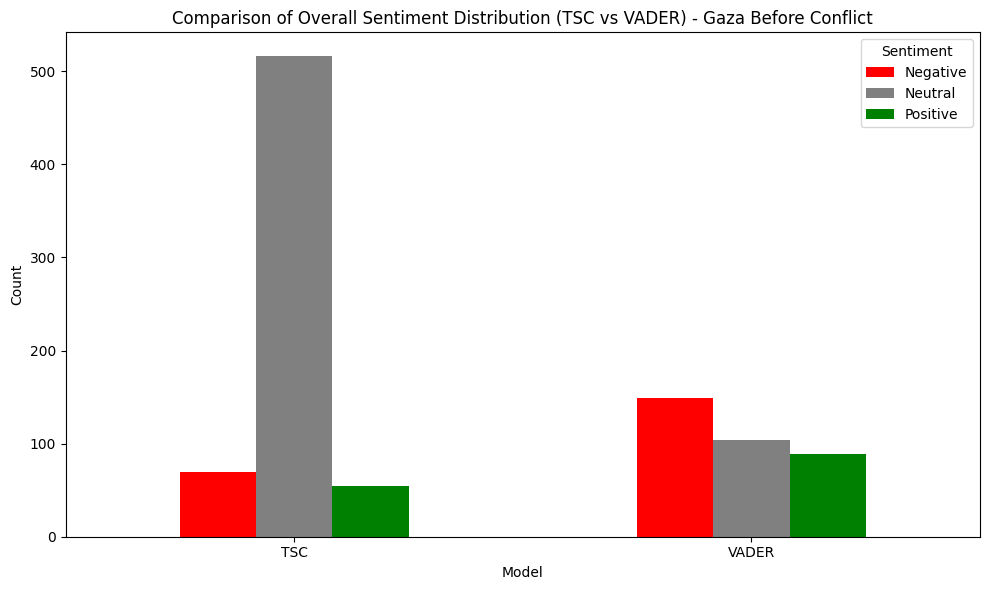

In [ ]:
sentiment_comparison.plot(kind='bar', color=['red', 'gray', 'green'], figsize=(10, 6))
plt.title('Comparison of Overall Sentiment Distribution (TSC vs VADER) - Gaza Before Conflict')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.tight_layout()
plt.show()

## Sentiment Over Time Comparison

In [ ]:
#process TSC results by month
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')  # Convert date to monthly periods
tsc_sentiment_counts = tsc_results_df.pivot_table(
    index=['month'],  #group by month
    columns='Sentiment',
    aggfunc='size',
    fill_value=0
)

In [ ]:
#normalize TSC sentiment proportions
tsc_sentiment_proportions = tsc_sentiment_counts.div(tsc_sentiment_counts.sum(axis=1), axis=0)

In [ ]:
#tsc_sentiment_proportions

In [ ]:
#process VADER results by month
vader_results_df['month'] = vader_results_df['published_time'].dt.to_period('M')  # Convert date to monthly periods
vader_sentiment_counts = vader_results_df.pivot_table(
    index=['month'],  #group by month
    columns='Sentiment',
    aggfunc='size',
    fill_value=0
)

In [ ]:
#vader_sentiment_counts

In [ ]:
#normalize VADER sentiment proportions
vader_sentiment_proportions = vader_sentiment_counts.div(vader_sentiment_counts.sum(axis=1), axis=0)

<Figure size 1200x600 with 0 Axes>

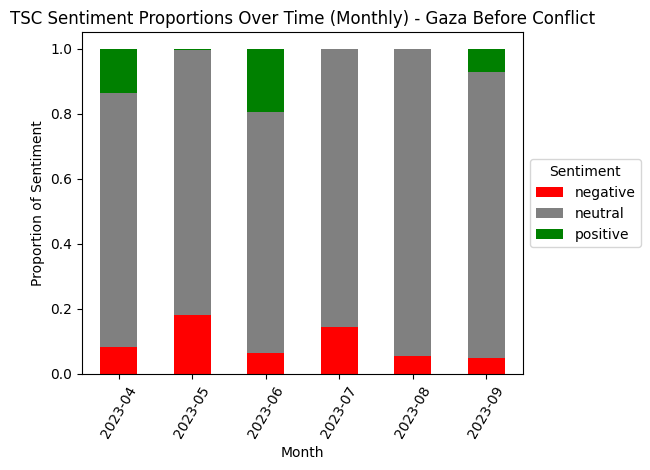

In [ ]:
#Plot 1: TSC Sentiment Proportions Over Time (Monthly)
plt.figure(figsize=(12, 6))
tsc_sentiment_proportions.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'])
plt.title('TSC Sentiment Proportions Over Time (Monthly) - Gaza Before Conflict')
plt.xlabel('Month')
plt.ylabel('Proportion of Sentiment')
plt.legend(title='Sentiment', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

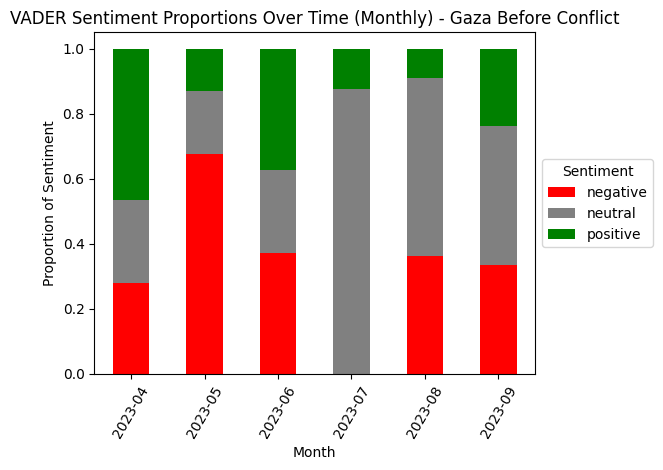

In [ ]:
#Plot 2: VADER Sentiment Proportions Over Time (Monthly)
plt.figure(figsize=(12, 6))
vader_sentiment_proportions.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'])
plt.title('VADER Sentiment Proportions Over Time (Monthly) - Gaza Before Conflict')
plt.xlabel('Month')
plt.ylabel('Proportion of Sentiment')
plt.legend(title='Sentiment', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

## Word Clouds

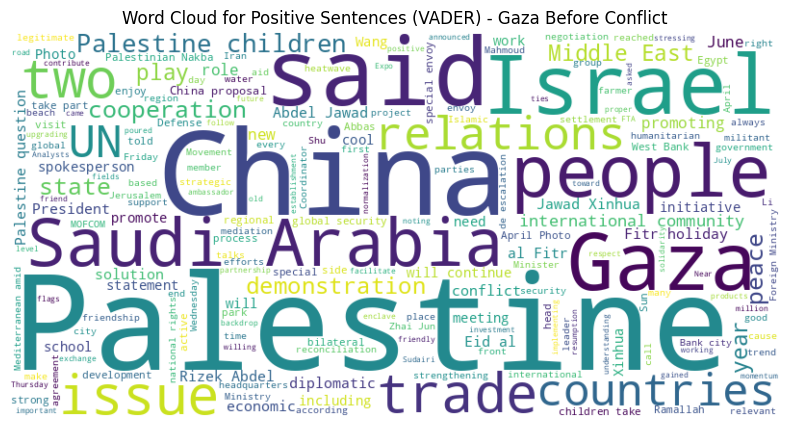

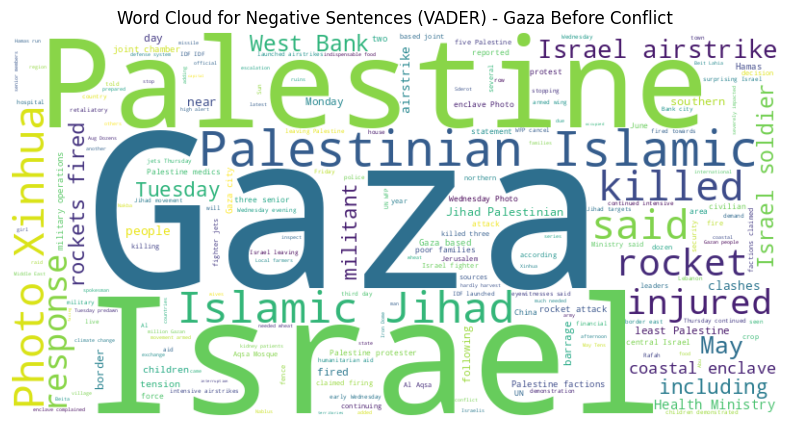

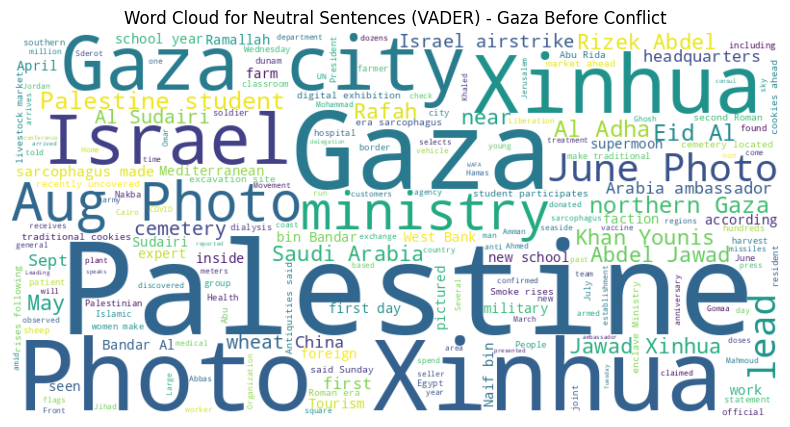

In [ ]:
#generate word cloud for VADER sentiment (positive, negative, neutral)
def wc_vader(sentiment_label, df):
    sentences = " ".join(df[df['Sentiment'] == sentiment_label]['Sentence'])

    if sentences:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentences)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment_label.capitalize()} Sentences (VADER) - Gaza Before Conflict')
        plt.show()

wc_vader('positive', vader_results_df)
wc_vader('negative', vader_results_df)
wc_vader('neutral', vader_results_df)


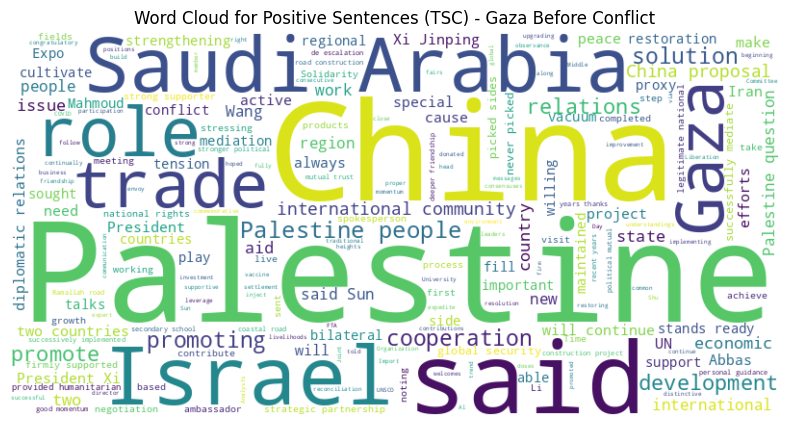

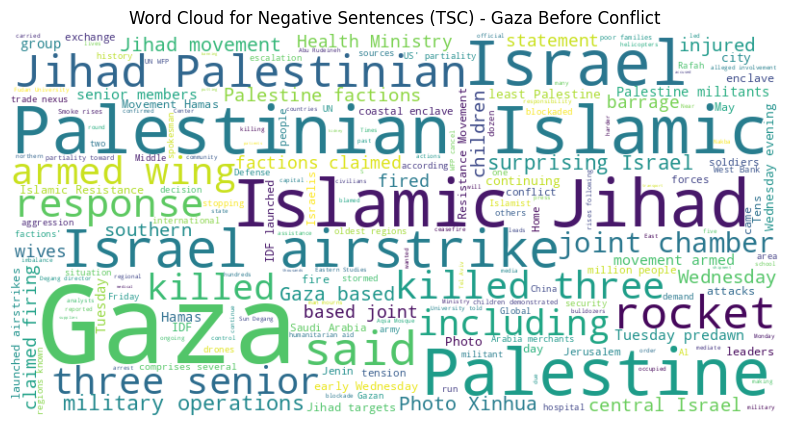

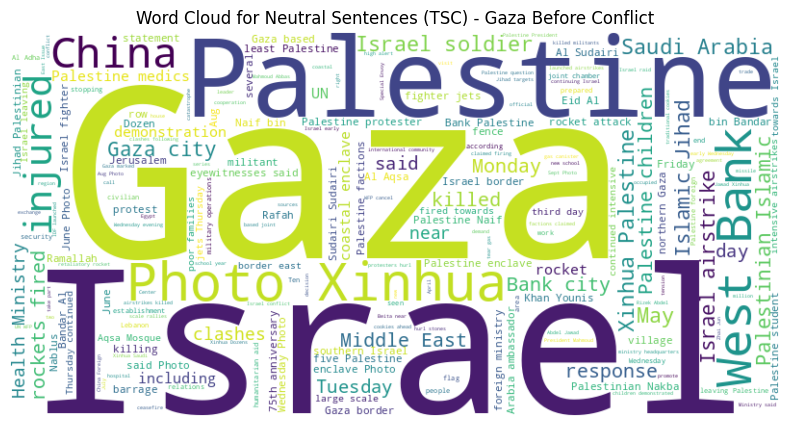

In [ ]:
#generate word cloud for TSC sentiment (positive, negative, neutral)
def wc_tsc(sentiment_label, df):
    sentences = " ".join(df[df['Sentiment'] == sentiment_label]['Sentence'])

    if sentences:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentences)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment_label.capitalize()} Sentences (TSC) - Gaza Before Conflict')
        plt.show()

wc_tsc('positive', tsc_results_df)
wc_tsc('negative', tsc_results_df)
wc_tsc('neutral', tsc_results_df)


## Targeted Sentiment Analysis Visualization using TSC

In [ ]:
#overall sentiment distribution per target

#group by target and sentiment, count the occurrences
overall_sentiment_per_target = tsc_results_df.groupby(['Target', 'Sentiment']).size().unstack(fill_value=0)
print(overall_sentiment_per_target )

#calculate sentiment proportions per target
overall_sentiment_per_target_proportion = overall_sentiment_per_target.div(overall_sentiment_per_target.sum(axis=1), axis=0)
overall_sentiment_per_target_proportion['Overall Sentiment'] = overall_sentiment_per_target_proportion[['positive', 'negative', 'neutral']].idxmax(axis=1)
print(overall_sentiment_per_target_proportion)

overall_sentiment_per_target_proportion.to_excel('overall_sentiment_per_target.xlsx')

Sentiment           negative  neutral  positive
Target                                         
Benjamin Netanyahu         0        1         0
China                      0       18        27
Gaza                       1      157         2
Hamas                      8        6         0
Israel                    38       92         2
Middle East                0       12         0
Palestine                 15      149        16
Rafah                      0       12         0
Saudi Arabia               2       14         4
UN                         3       17         1
US                         2        0         0
West                       0       19         0
West Bank                  0       18         0
Xi Jinping                 0        1         2
Sentiment           negative   neutral  positive Overall Sentiment
Target                                                            
Benjamin Netanyahu  0.000000  1.000000  0.000000           neutral
China               0.000000  0

<Figure size 1200x800 with 0 Axes>

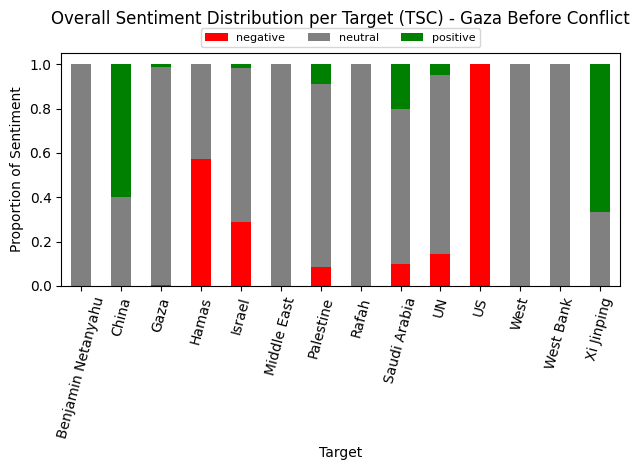

In [ ]:
#plot stacked bar chart for overall sentiment distribution per target
plt.figure(figsize=(12, 8))
overall_sentiment_per_target_proportion.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'])
plt.title('Overall Sentiment Distribution per Target (TSC) - Gaza Before Conflict\n')
plt.xlabel('Target')
plt.ylabel('Proportion of Sentiment')
plt.xticks(rotation=75)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=3, fontsize=8)
plt.tight_layout()
plt.show()

## Visualization Sentiment Overtime for Target

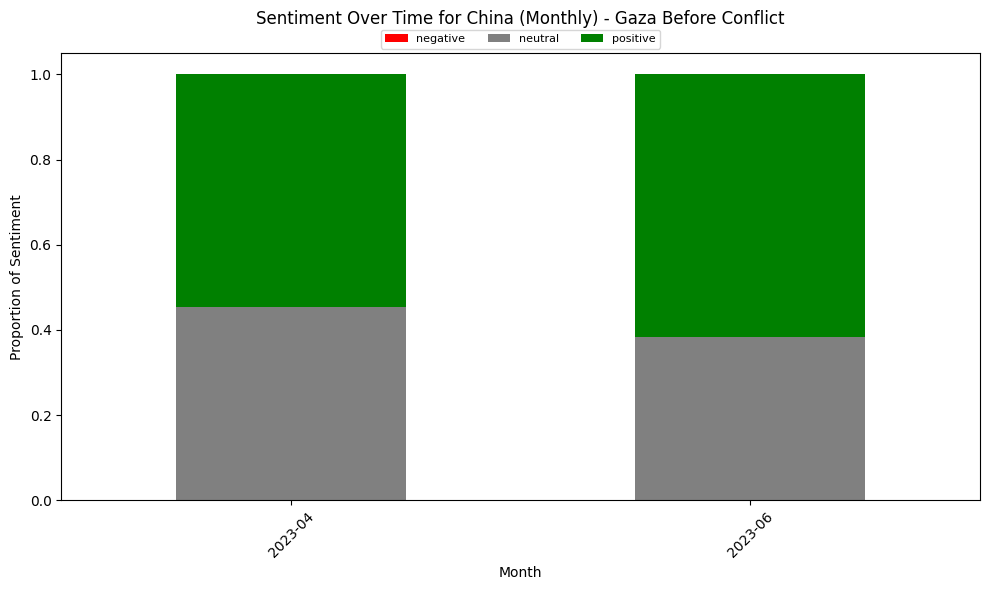

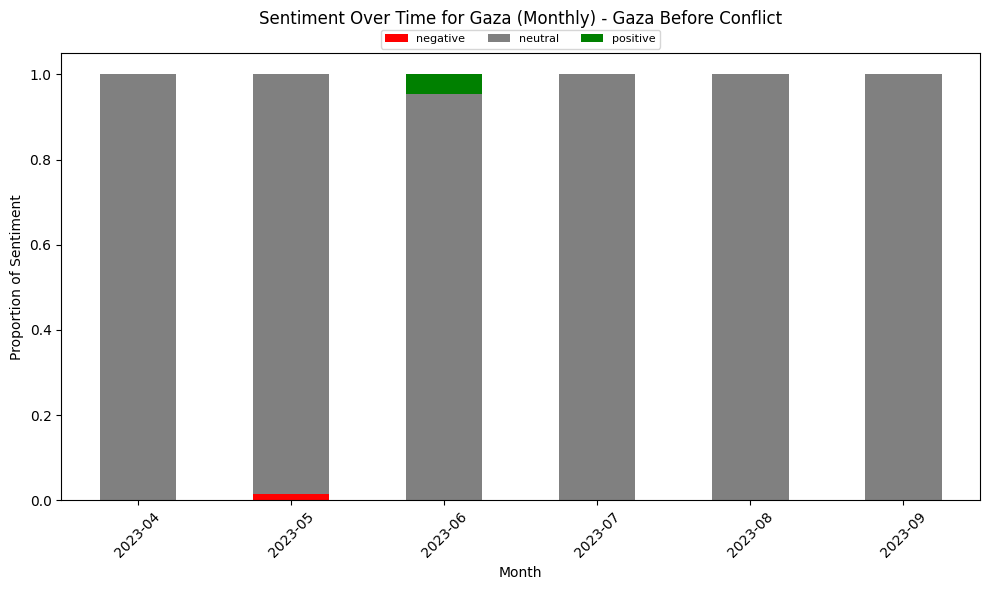

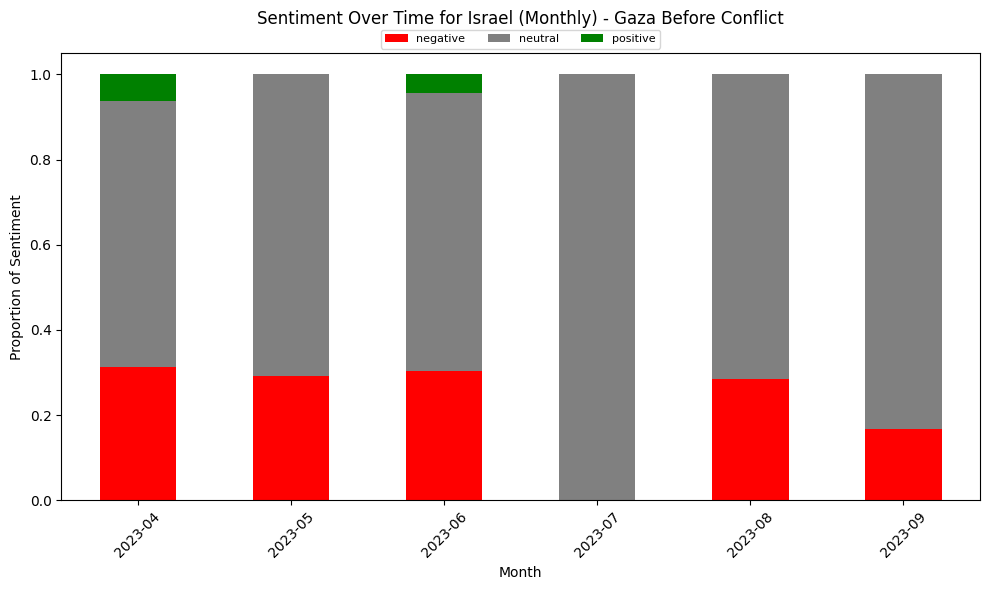

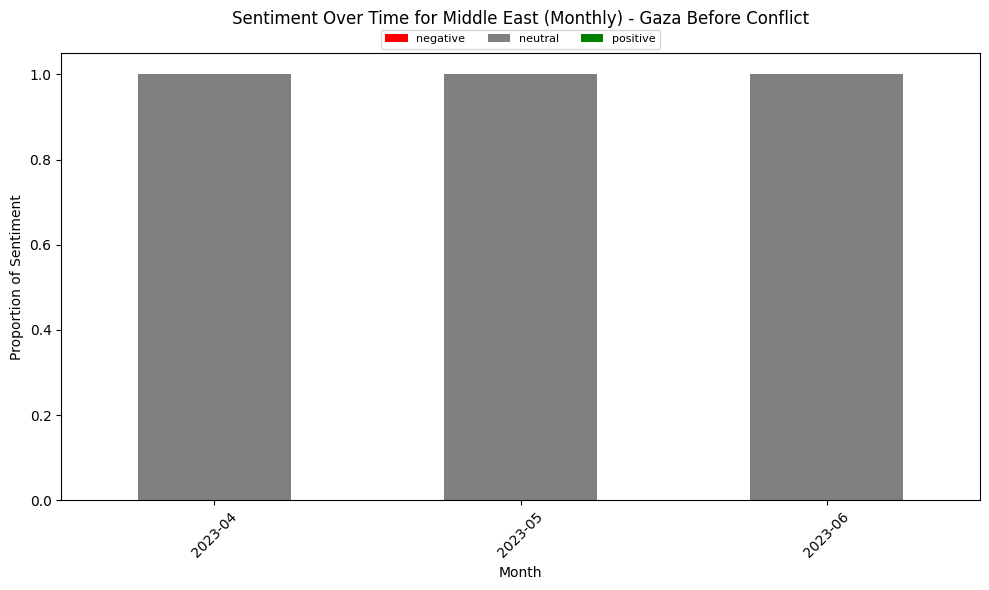

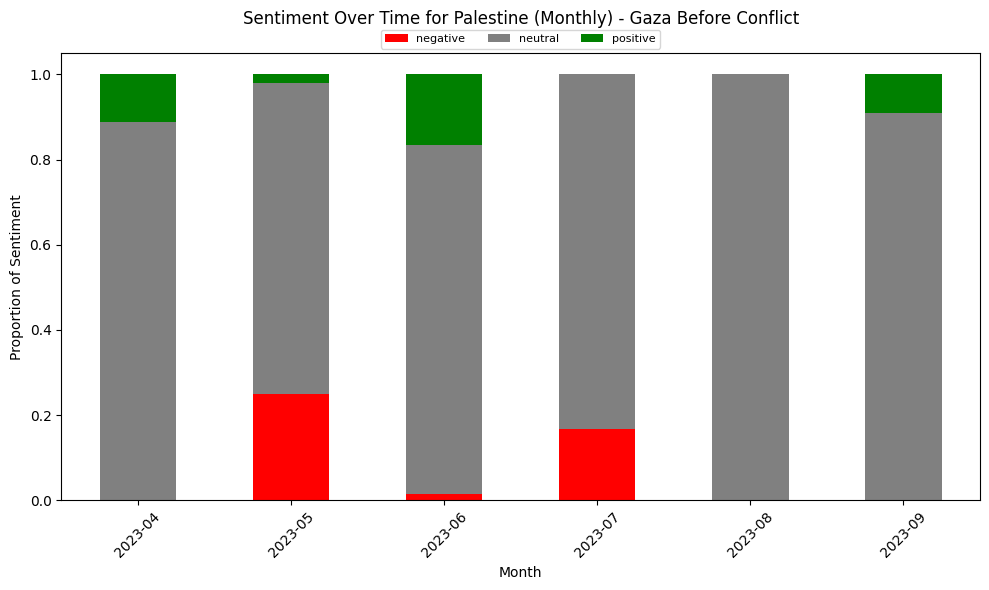

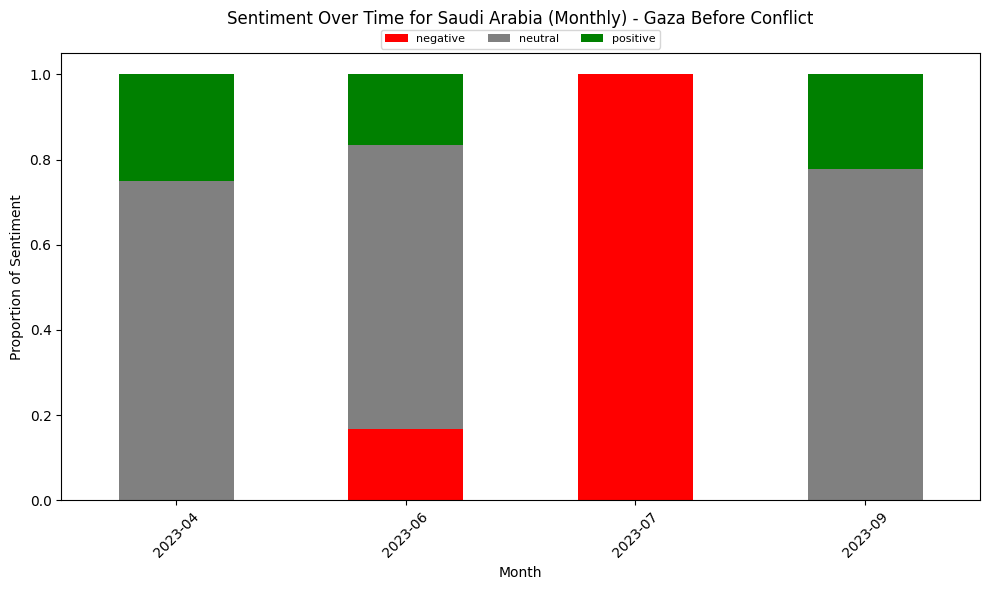

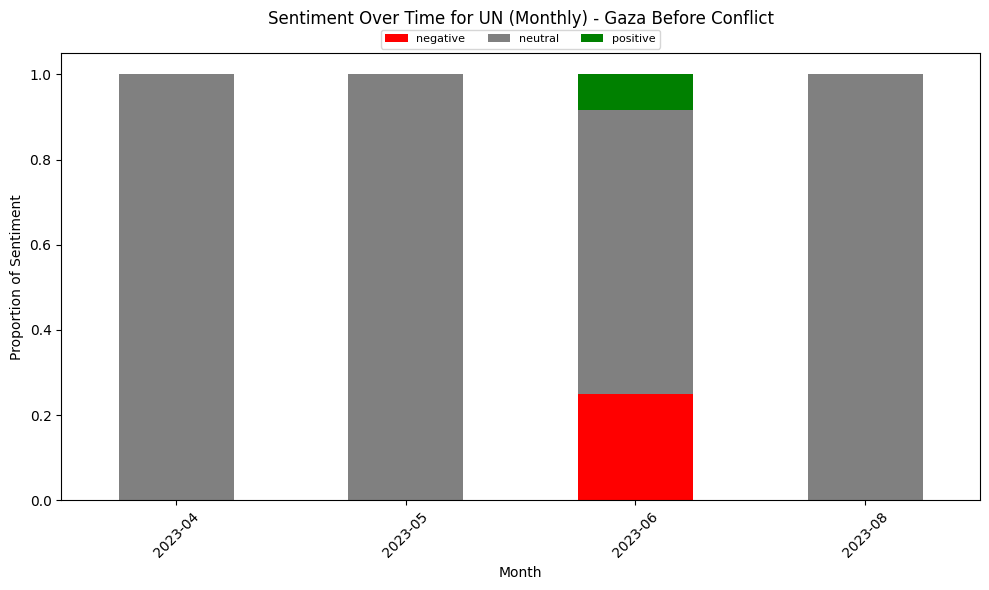

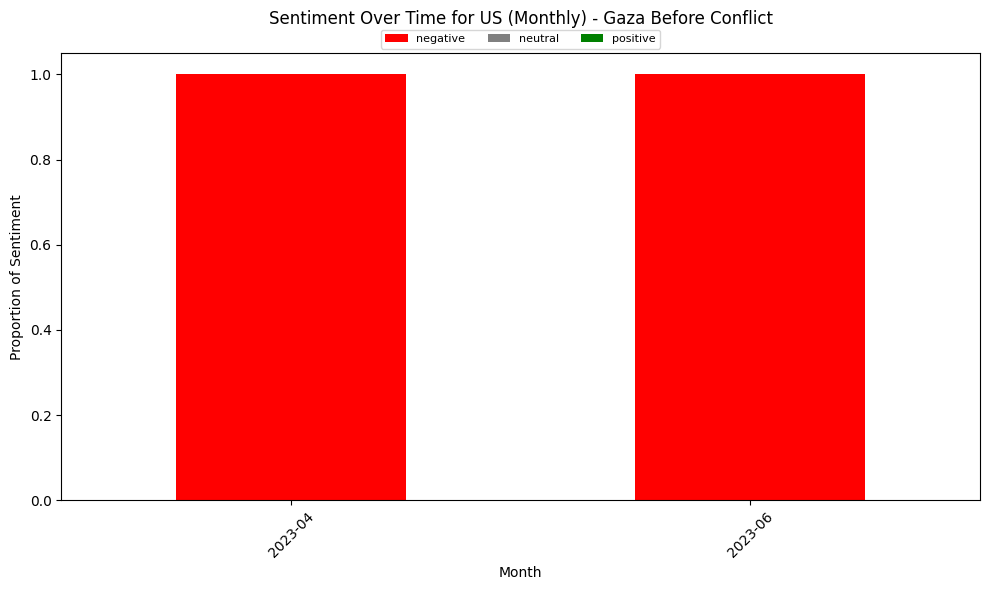

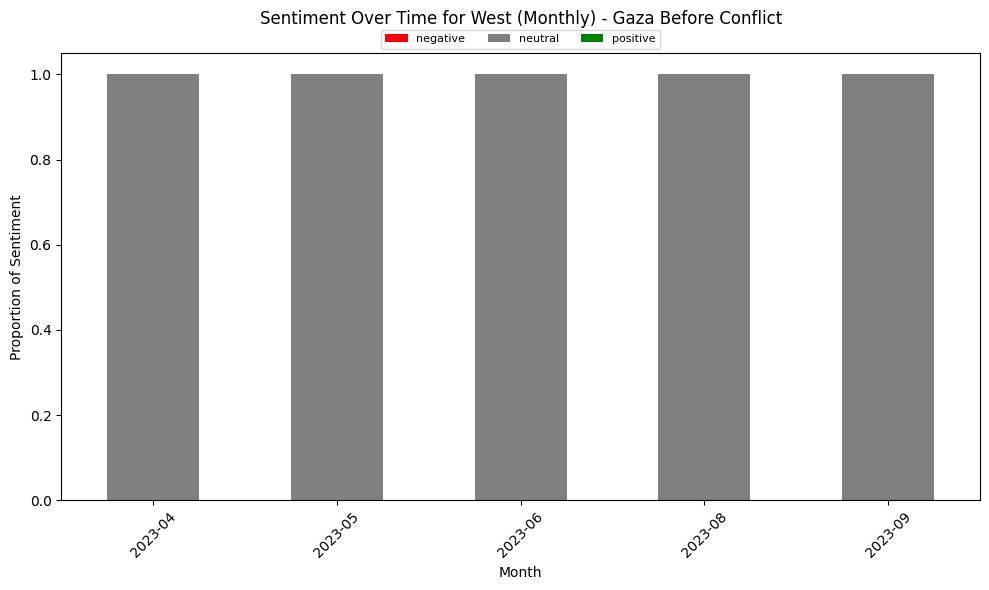

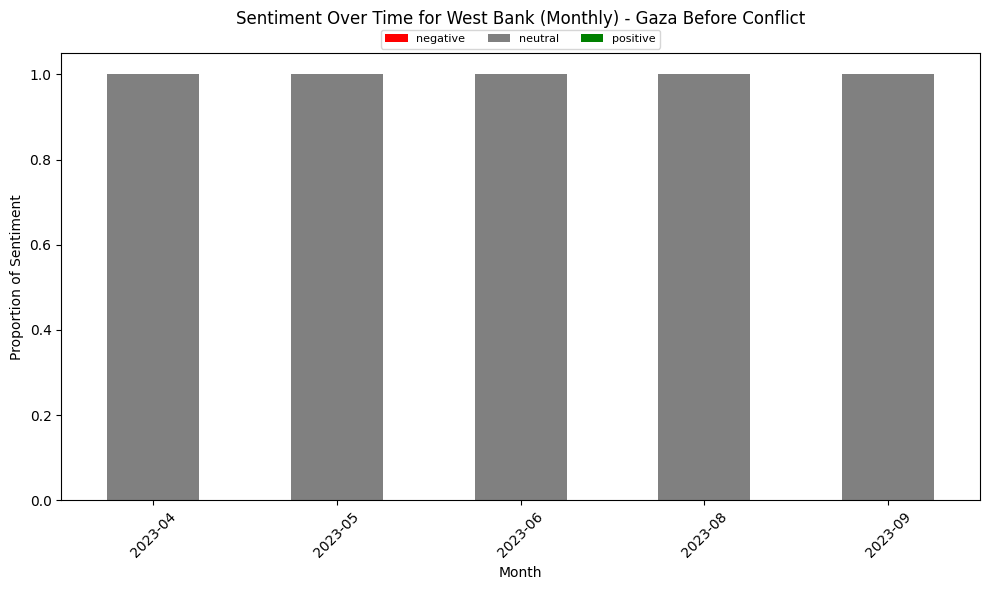

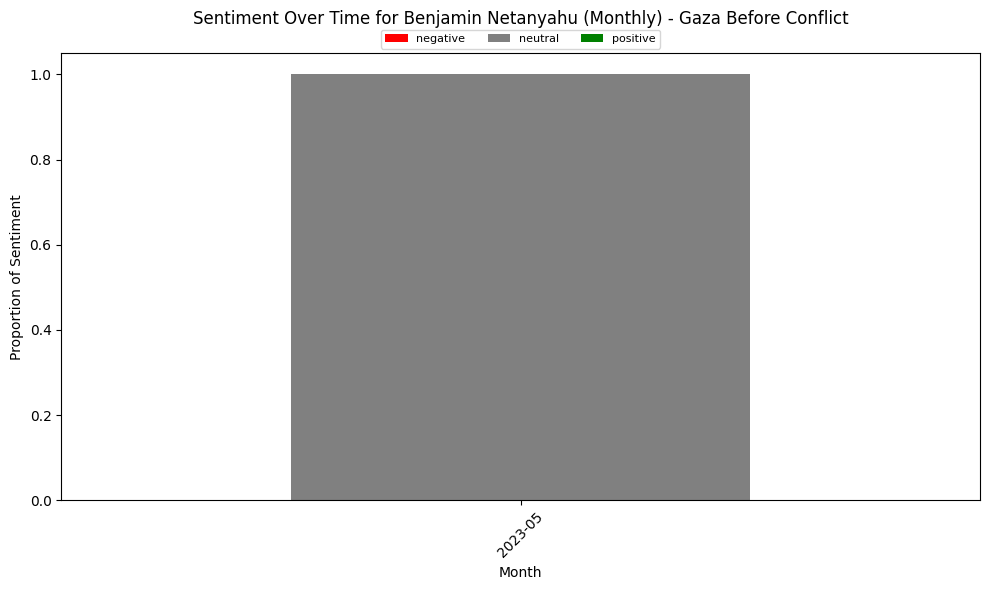

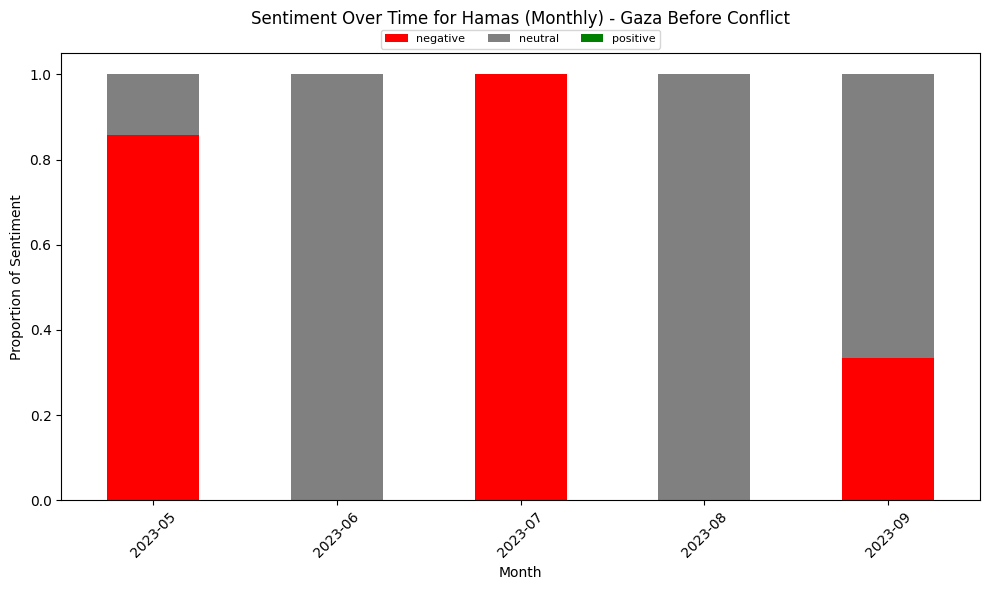

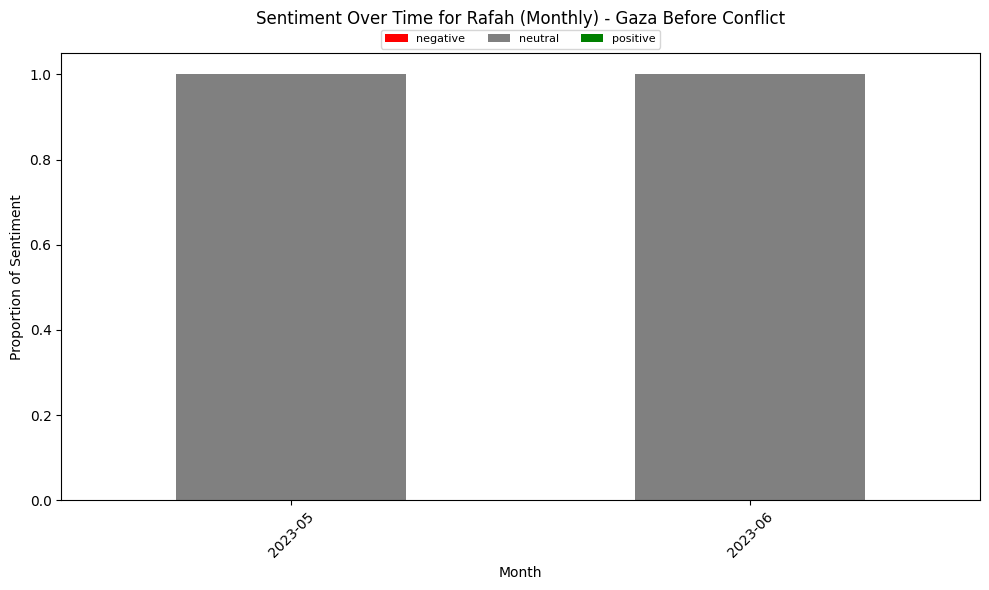

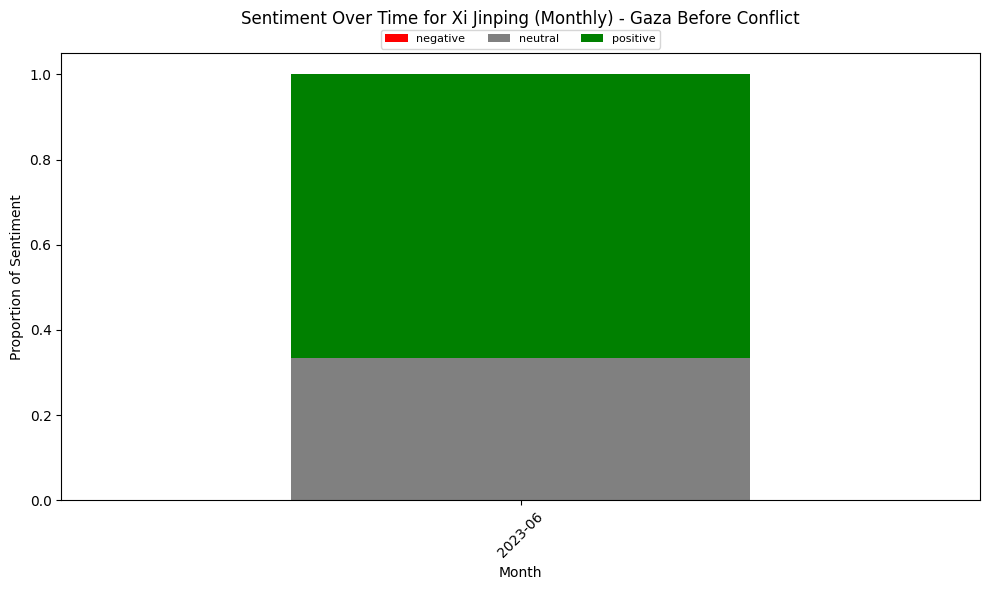

In [ ]:
#sentiment over time by target - monthly

tsc_results_df['published_time'] = pd.to_datetime(tsc_results_df['published_time'])
#convert date to monthly periods
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')

#group by month and target, count sentiment occurrences
sentiment_over_time = tsc_results_df.groupby(['month', 'Target', 'Sentiment']).size().unstack(fill_value=0)

#normalize to get sentiment proportions over time
sentiment_over_time_proportion = sentiment_over_time.div(sentiment_over_time.sum(axis=1), axis=0)

#plot sentiment over time for each target (monthly) using stacked bar chart
for target in sentiment_over_time_proportion.index.get_level_values('Target').unique():
    target_data = sentiment_over_time_proportion.xs(target, level='Target')

    #convert PeriodIndex to string for plotting
    months = target_data.index.astype(str)

    target_data.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'], figsize=(10, 6))
    plt.title(f'Sentiment Over Time for {target} (Monthly) - Gaza Before Conflict\n')
    plt.xlabel('Month')
    plt.ylabel('Proportion of Sentiment')
    plt.xticks(rotation=45)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.065), ncol=3, fontsize=8)
    plt.tight_layout()
    plt.show()


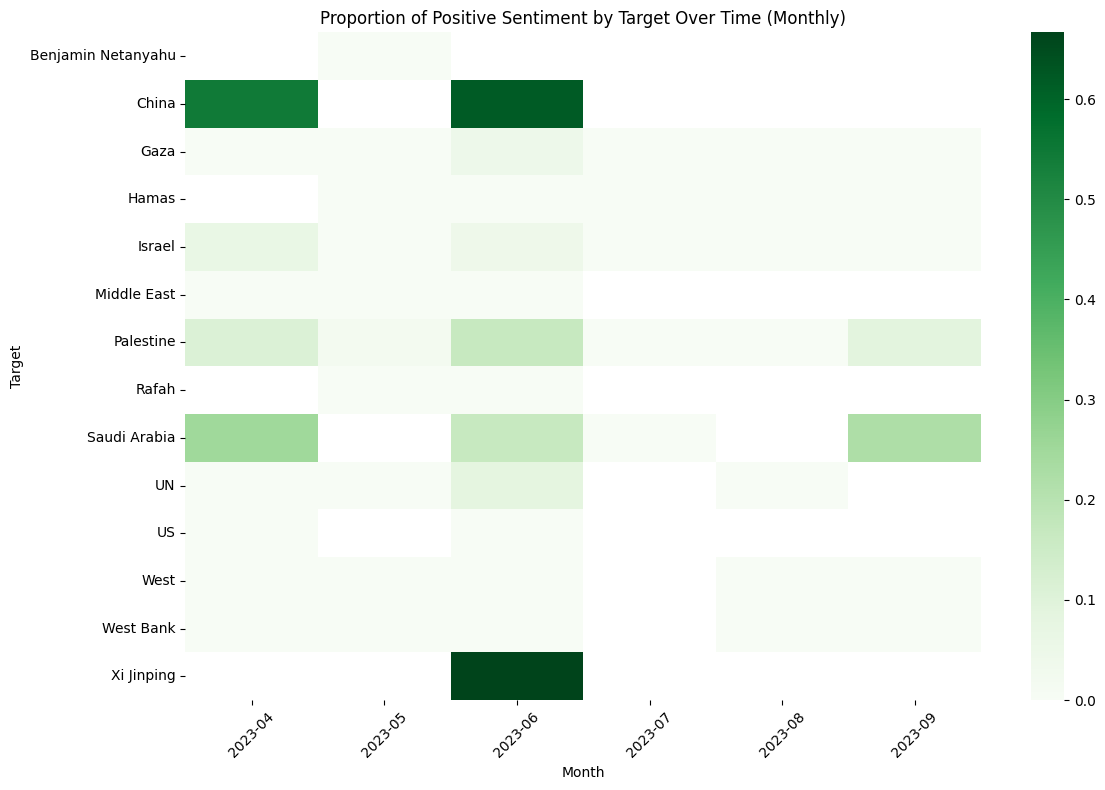

In [ ]:
tsc_results_df['published_time'] = pd.to_datetime(tsc_results_df['published_time'])
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')

#heatmap (target vs. month)
heatmap_data = tsc_results_df.pivot_table(index='Target', columns='month', values='Sentiment', aggfunc=lambda x: (x == 'positive').mean())

#heatmap showing the proportion of positive sentiment by target over time (monthly)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Greens', annot=False, cbar=True)
plt.title('Proportion of Positive Sentiment by Target Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


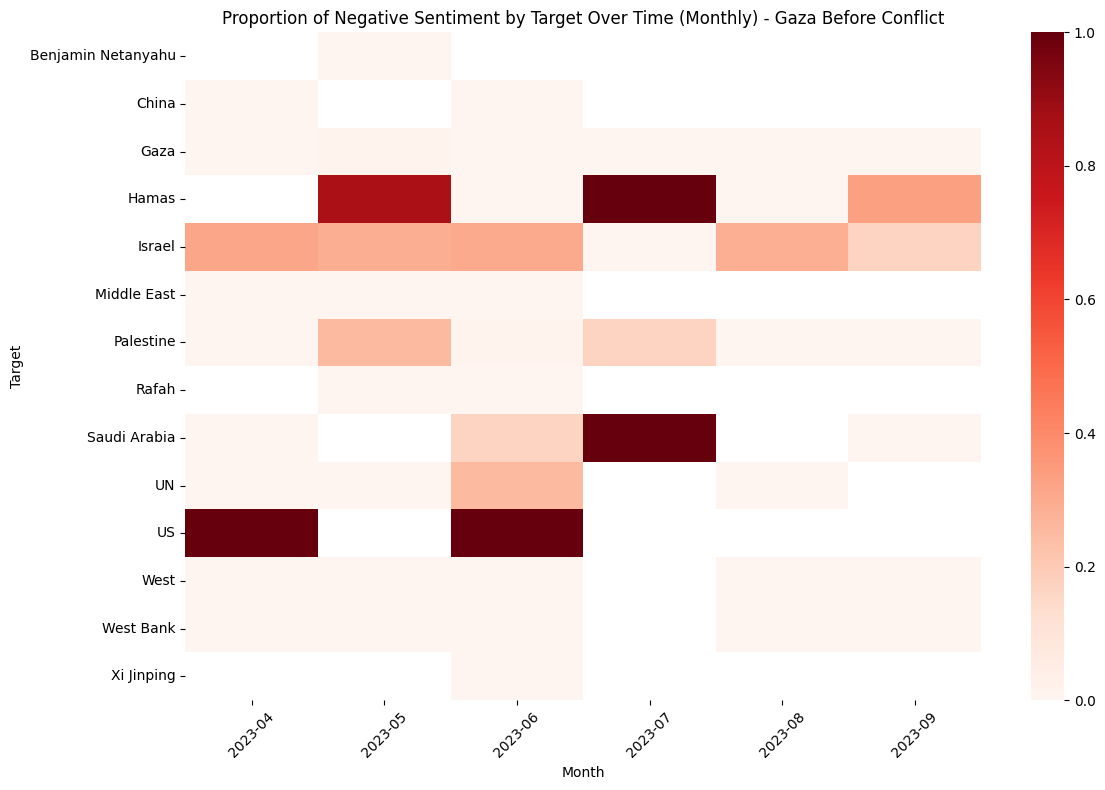

In [ ]:
tsc_results_df['published_time'] = pd.to_datetime(tsc_results_df['published_time'])
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')

#heatmap (target vs. month)
heatmap_data = tsc_results_df.pivot_table(index='Target', columns='month', values='Sentiment', aggfunc=lambda x: (x == 'negative').mean())

#heatmap showing the proportion of negative sentiment by target over time (monthly)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Reds', annot=False, cbar=True)
plt.title('Proportion of Negative Sentiment by Target Over Time (Monthly) - Gaza Before Conflict')
plt.xlabel('Month')
plt.ylabel('Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

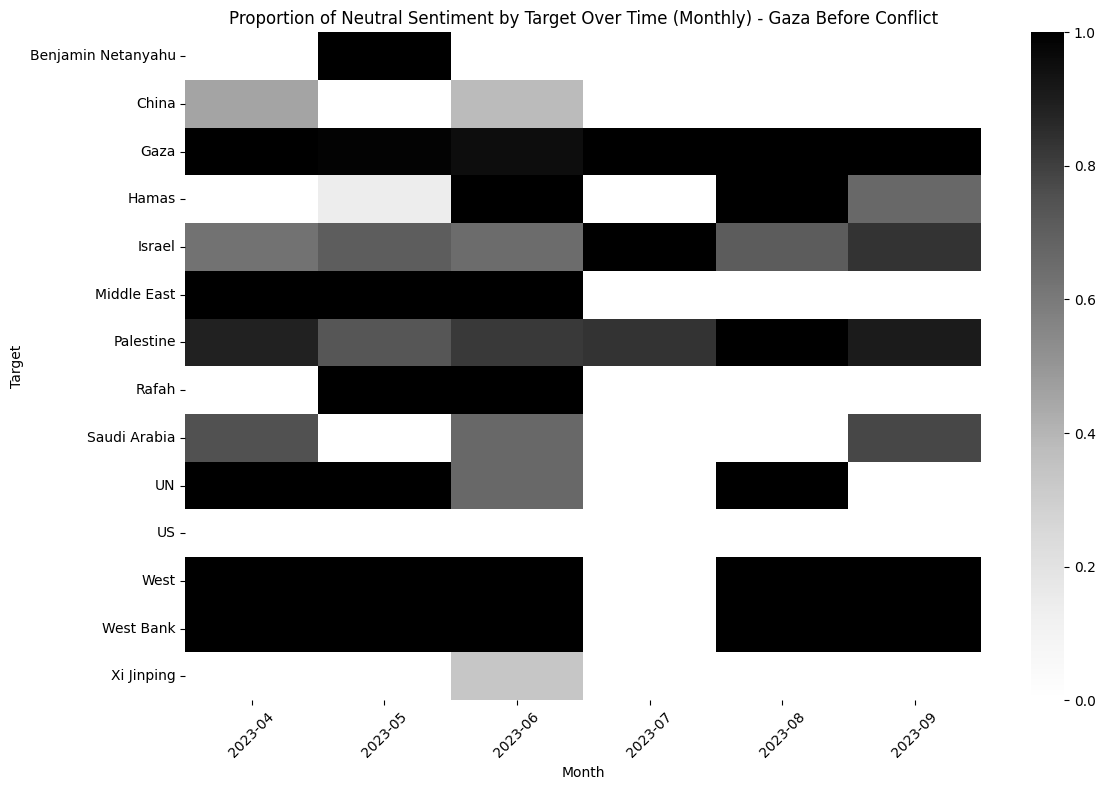

In [ ]:
tsc_results_df['published_time'] = pd.to_datetime(tsc_results_df['published_time'])
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')

#heatmap (target vs. month)
heatmap_data = tsc_results_df.pivot_table(index='Target', columns='month', values='Sentiment', aggfunc=lambda x: (x == 'neutral').mean())

#heatmap showing the proportion of neutral sentiment by target over time (monthly)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Greys', annot=False, cbar=True)
plt.title('Proportion of Neutral Sentiment by Target Over Time (Monthly) - Gaza Before Conflict')
plt.xlabel('Month')
plt.ylabel('Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()